# Loan status prediction

load dataset (available on kaggle: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset)

In [60]:
import pandas as pd
LoanDF = pd.read_csv("data/train.csv")

# Analyse and preprocess dataset

In [61]:
print(LoanDF.shape)
LoanDF.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [62]:
LoanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [63]:
LoanDF.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [64]:
LoanDF.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001664,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [65]:
pd.unique(LoanDF["Dependents"])

array(['0', '1', '2', '3+', nan], dtype=object)

In [66]:
index = LoanDF.index[LoanDF["Dependents"] == "3+"].tolist()
print(index)

[7, 34, 61, 68, 73, 74, 78, 79, 109, 126, 135, 155, 171, 172, 177, 202, 211, 213, 215, 255, 257, 259, 267, 295, 321, 324, 338, 340, 343, 352, 359, 376, 390, 391, 409, 442, 461, 466, 472, 481, 515, 522, 531, 539, 557, 567, 574, 592, 600, 602, 610]


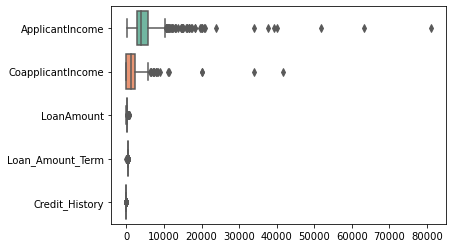

In [67]:
import seaborn as sns
ax = sns.boxplot(data=LoanDF, orient="h", palette="Set2")

In [68]:
import numpy as np
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
outlier_datapoints = detect_outlier(LoanDF['ApplicantIncome'])
print(outlier_datapoints)

[23803, 39999, 51763, 33846, 39147, 63337, 81000, 37719]


In [69]:
outlier_datapoints = detect_outlier(LoanDF['CoapplicantIncome'])
print(outlier_datapoints)

[23803, 39999, 51763, 33846, 39147, 63337, 81000, 37719, 10968.0, 11300.0, 20000.0, 20000.0, 33837.0, 41667.0]


In [70]:
LoanDF.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [71]:
# using other methods like SimpleImputer
LoanDF = LoanDF.dropna()
LoanDF.shape

(480, 13)

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_to_convert = ["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]
for column in columns_to_convert:
    LoanDF[column] = le.fit_transform(LoanDF[column].astype(str))
LoanDF.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [73]:
LoanDF.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,239.500000,0.820833,0.647917,0.777083,0.202083,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,138.708327,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,119.750000,1.000000,0.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,239.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,359.250000,1.000000,1.000000,2.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,479.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [75]:
LoanDF['Total']=LoanDF['ApplicantIncome'] + LoanDF['CoapplicantIncome']
LoanDF.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,9613.0


In [80]:
from sklearn.ensemble import IsolationForest
import numpy as np
clf = IsolationForest( behaviour = 'new', max_samples=len(LoanDF['Total']), random_state = 1, contamination= 'auto')
preds = clf.fit_predict(np.array(LoanDF['Total']).reshape(-1, 1))
np.unique(preds, return_counts=True)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


(array([-1,  1]), array([ 54, 426], dtype=int64))

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total', ylabel='Density'>

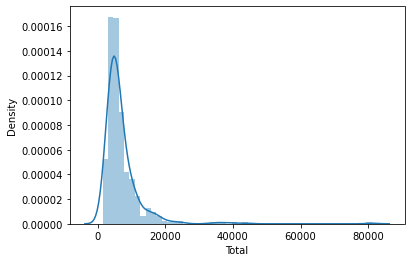

In [82]:
sns.distplot(LoanDF['Total'])

array([[<AxesSubplot:title={'center':'Loan_ID'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Self_Employed'}>,
        <AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Property_Area'}>],
       [<AxesSubplot:title={'center':'Loan_Status'}>,
        <AxesSubplot:title={'center':'Total'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

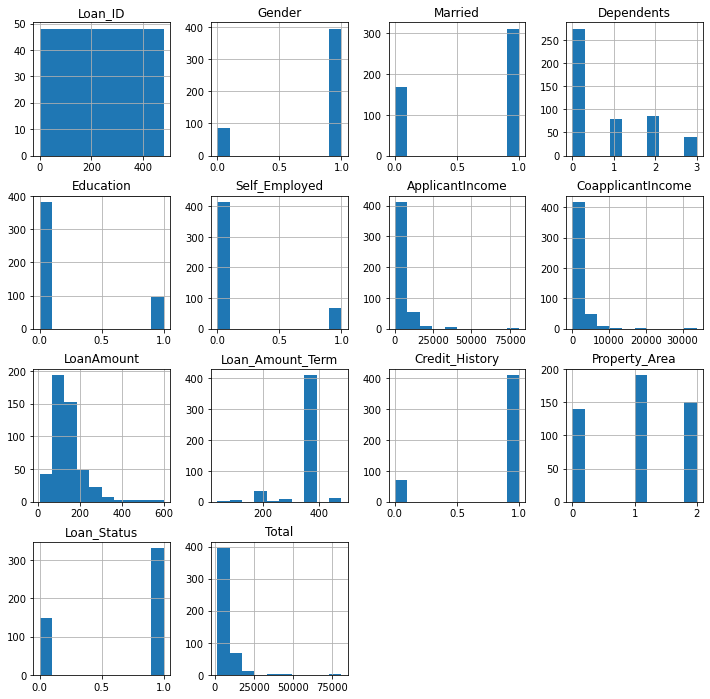

In [86]:
LoanDF.hist(figsize = (12, 12))

In [87]:
LoanDF.drop(['ApplicantIncome', 'CoapplicantIncome'], axis = 1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total
1,0,1,1,1,0,0,128.0,360.0,1.0,0,0,6091.0
2,1,1,1,0,0,1,66.0,360.0,1.0,2,1,3000.0
3,2,1,1,0,1,0,120.0,360.0,1.0,2,1,4941.0
4,3,1,0,0,0,0,141.0,360.0,1.0,2,1,6000.0
5,4,1,1,2,0,1,267.0,360.0,1.0,2,1,9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,475,0,0,0,0,0,71.0,360.0,1.0,0,1,2900.0
610,476,1,1,3,0,0,40.0,180.0,1.0,0,1,4106.0
611,477,1,1,1,0,0,253.0,360.0,1.0,2,1,8312.0
612,478,1,1,2,0,0,187.0,360.0,1.0,2,1,7583.0


In [111]:
Xtotal = np.array(LoanDF.drop(['Loan_Status'], 1))
Ytotal = np.array(LoanDF['Loan_Status'])
X, X_test, Y, y_test = train_test_split(Xtotal, Ytotal, test_size=0.05, stratify=Ytotal, shuffle = True, random_state = 100)

# Build and train the model k-fold cross-validation and save the best

In [112]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold

seed = 7
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

checkpoint_filepath = 'weights.{epoch:02d}-{val_loss:.2f}.h5'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
accuracy = []
for train, test in kfold.split(X, Y):
  # create model
    model = Sequential()
    model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(X.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X[train], Y[train], validation_data=(X[test], Y[test]), epochs=50, batch_size=10, callbacks=[model_checkpoint_callback])
    accuracy.append(history.history['val_accuracy'])

Epoch 1/50
41/41 [==============================] - 1s 4ms/step - loss: 818.7815 - accuracy: 0.3098 - val_loss: 166.8770 - val_accuracy: 0.3043
Epoch 2/50
41/41 [==============================] - 0s 1ms/step - loss: 53.0971 - accuracy: 0.6098 - val_loss: 19.0827 - val_accuracy: 0.5217
Epoch 3/50
41/41 [==============================] - 0s 1ms/step - loss: 25.7575 - accuracy: 0.5537 - val_loss: 10.1555 - val_accuracy: 0.6522
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 14.8795 - accuracy: 0.6195 - val_loss: 7.1955 - val_accuracy: 0.6522
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 10.0834 - accuracy: 0.6049 - val_loss: 8.8597 - val_accuracy: 0.6957
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 8.6407 - accuracy: 0.5976 - val_loss: 9.6858 - val_accuracy: 0.5870
Epoch 7/50
41/41 [==============================] - 0s 2ms/step - loss: 7.3047 - accuracy: 0.5951 - val_loss: 7.7340 - val_accuracy: 0.5870
Epoch 8/50

Epoch 9/50
41/41 [==============================] - 0s 2ms/step - loss: 10.6818 - accuracy: 0.6098 - val_loss: 8.5167 - val_accuracy: 0.6304
Epoch 10/50
41/41 [==============================] - 0s 2ms/step - loss: 10.5369 - accuracy: 0.6122 - val_loss: 13.1095 - val_accuracy: 0.6739
Epoch 11/50
41/41 [==============================] - 0s 2ms/step - loss: 12.4950 - accuracy: 0.5927 - val_loss: 7.7951 - val_accuracy: 0.4348
Epoch 12/50
41/41 [==============================] - 0s 2ms/step - loss: 4.2519 - accuracy: 0.6000 - val_loss: 12.5817 - val_accuracy: 0.3043
Epoch 13/50
41/41 [==============================] - 0s 2ms/step - loss: 5.2869 - accuracy: 0.6098 - val_loss: 3.5147 - val_accuracy: 0.6087
Epoch 14/50
41/41 [==============================] - 0s 2ms/step - loss: 11.2789 - accuracy: 0.5878 - val_loss: 5.1155 - val_accuracy: 0.6304
Epoch 15/50
41/41 [==============================] - 0s 2ms/step - loss: 7.8642 - accuracy: 0.5854 - val_loss: 15.9157 - val_accuracy: 0.6739
Epoch 1

41/41 [==============================] - 0s 2ms/step - loss: 11.6356 - accuracy: 0.6024 - val_loss: 14.1924 - val_accuracy: 0.6957
Epoch 17/50
41/41 [==============================] - 0s 2ms/step - loss: 10.9722 - accuracy: 0.6122 - val_loss: 8.4034 - val_accuracy: 0.4783
Epoch 18/50
41/41 [==============================] - 0s 2ms/step - loss: 11.6284 - accuracy: 0.6171 - val_loss: 18.7121 - val_accuracy: 0.5217
Epoch 19/50
41/41 [==============================] - 0s 2ms/step - loss: 18.0567 - accuracy: 0.5902 - val_loss: 14.5649 - val_accuracy: 0.6957
Epoch 20/50
41/41 [==============================] - 0s 2ms/step - loss: 8.3275 - accuracy: 0.6073 - val_loss: 7.6067 - val_accuracy: 0.5217
Epoch 21/50
41/41 [==============================] - 0s 2ms/step - loss: 9.0454 - accuracy: 0.6171 - val_loss: 8.4737 - val_accuracy: 0.4348
Epoch 22/50
41/41 [==============================] - ETA: 0s - loss: 10.7773 - accuracy: 0.600 - 0s 2ms/step - loss: 9.2580 - accuracy: 0.6024 - val_loss: 7.14

41/41 [==============================] - 0s 2ms/step - loss: 14.5419 - accuracy: 0.5951 - val_loss: 3.5670 - val_accuracy: 0.7174
Epoch 23/50
41/41 [==============================] - 0s 2ms/step - loss: 12.2704 - accuracy: 0.5463 - val_loss: 5.3836 - val_accuracy: 0.6957
Epoch 24/50
41/41 [==============================] - 0s 2ms/step - loss: 18.2003 - accuracy: 0.5366 - val_loss: 6.5756 - val_accuracy: 0.6957
Epoch 25/50
41/41 [==============================] - 0s 2ms/step - loss: 10.0708 - accuracy: 0.6073 - val_loss: 2.1063 - val_accuracy: 0.4565
Epoch 26/50
41/41 [==============================] - 0s 2ms/step - loss: 15.1264 - accuracy: 0.5829 - val_loss: 13.1037 - val_accuracy: 0.7609
Epoch 27/50
41/41 [==============================] - 0s 2ms/step - loss: 9.9529 - accuracy: 0.5561 - val_loss: 4.8156 - val_accuracy: 0.6739
Epoch 28/50
41/41 [==============================] - 0s 2ms/step - loss: 6.5111 - accuracy: 0.6488 - val_loss: 2.4080 - val_accuracy: 0.7826
Epoch 29/50
41/41 [

41/41 [==============================] - 0s 2ms/step - loss: 2.7275 - accuracy: 0.6049 - val_loss: 3.5810 - val_accuracy: 0.6739
Epoch 31/50
41/41 [==============================] - 0s 2ms/step - loss: 6.7469 - accuracy: 0.5561 - val_loss: 6.9356 - val_accuracy: 0.6957
Epoch 32/50
41/41 [==============================] - 0s 2ms/step - loss: 4.3969 - accuracy: 0.5927 - val_loss: 1.8603 - val_accuracy: 0.6087
Epoch 33/50
41/41 [==============================] - 0s 2ms/step - loss: 3.9115 - accuracy: 0.5732 - val_loss: 2.2262 - val_accuracy: 0.5000
Epoch 34/50
41/41 [==============================] - 0s 2ms/step - loss: 7.0998 - accuracy: 0.5561 - val_loss: 1.7466 - val_accuracy: 0.6739
Epoch 35/50
41/41 [==============================] - 0s 2ms/step - loss: 2.6605 - accuracy: 0.5976 - val_loss: 2.8078 - val_accuracy: 0.6522
Epoch 36/50
41/41 [==============================] - 0s 2ms/step - loss: 7.7048 - accuracy: 0.6073 - val_loss: 2.3114 - val_accuracy: 0.6739
Epoch 37/50
41/41 [======

41/41 [==============================] - 0s 1ms/step - loss: 5.8389 - accuracy: 0.5951 - val_loss: 9.2754 - val_accuracy: 0.5870
Epoch 37/50
41/41 [==============================] - 0s 2ms/step - loss: 7.5807 - accuracy: 0.5707 - val_loss: 4.1922 - val_accuracy: 0.5435
Epoch 38/50
41/41 [==============================] - 0s 2ms/step - loss: 4.6120 - accuracy: 0.6146 - val_loss: 6.7818 - val_accuracy: 0.6739
Epoch 39/50
41/41 [==============================] - 0s 2ms/step - loss: 5.0031 - accuracy: 0.5976 - val_loss: 9.8652 - val_accuracy: 0.6739
Epoch 40/50
41/41 [==============================] - 0s 1ms/step - loss: 7.7010 - accuracy: 0.5366 - val_loss: 18.8908 - val_accuracy: 0.4130
Epoch 41/50
41/41 [==============================] - ETA: 0s - loss: 14.3138 - accuracy: 0.300 - 0s 1ms/step - loss: 6.6224 - accuracy: 0.5707 - val_loss: 7.0878 - val_accuracy: 0.6739
Epoch 42/50
41/41 [==============================] - 0s 1ms/step - loss: 9.9181 - accuracy: 0.5561 - val_loss: 16.2289 - 

Epoch 43/50
42/42 [==============================] - 0s 2ms/step - loss: 3.3996 - accuracy: 0.6107 - val_loss: 1.7442 - val_accuracy: 0.6889
Epoch 44/50
42/42 [==============================] - 0s 2ms/step - loss: 9.5322 - accuracy: 0.5474 - val_loss: 13.4110 - val_accuracy: 0.6889
Epoch 45/50
42/42 [==============================] - 0s 2ms/step - loss: 3.9562 - accuracy: 0.5499 - val_loss: 13.5047 - val_accuracy: 0.3111
Epoch 46/50
42/42 [==============================] - 0s 2ms/step - loss: 5.8155 - accuracy: 0.5669 - val_loss: 7.2019 - val_accuracy: 0.3111
Epoch 47/50
42/42 [==============================] - 0s 2ms/step - loss: 4.1880 - accuracy: 0.5499 - val_loss: 3.0624 - val_accuracy: 0.7111
Epoch 48/50
42/42 [==============================] - 0s 2ms/step - loss: 2.8178 - accuracy: 0.5791 - val_loss: 2.5593 - val_accuracy: 0.6667
Epoch 49/50
42/42 [==============================] - 0s 2ms/step - loss: 3.8313 - accuracy: 0.5742 - val_loss: 6.3498 - val_accuracy: 0.6889
Epoch 50/50

Epoch 1/50
42/42 [==============================] - 0s 4ms/step - loss: 993.4932 - accuracy: 0.3090 - val_loss: 870.8162 - val_accuracy: 0.3111
Epoch 2/50
42/42 [==============================] - 0s 1ms/step - loss: 457.0616 - accuracy: 0.3090 - val_loss: 331.2886 - val_accuracy: 0.3111
Epoch 3/50
42/42 [==============================] - 0s 1ms/step - loss: 82.5660 - accuracy: 0.5474 - val_loss: 45.2900 - val_accuracy: 0.5556
Epoch 4/50
42/42 [==============================] - 0s 2ms/step - loss: 27.7778 - accuracy: 0.6277 - val_loss: 50.4828 - val_accuracy: 0.5778
Epoch 5/50
42/42 [==============================] - 0s 2ms/step - loss: 21.3114 - accuracy: 0.6326 - val_loss: 47.7276 - val_accuracy: 0.6222
Epoch 6/50
42/42 [==============================] - ETA: 0s - loss: 37.2544 - accuracy: 0.400 - 0s 2ms/step - loss: 15.1492 - accuracy: 0.6180 - val_loss: 42.1018 - val_accuracy: 0.5778
Epoch 7/50
42/42 [==============================] - 0s 2ms/step - loss: 10.4114 - accuracy: 0.6058 -

42/42 [==============================] - 0s 1ms/step - loss: 9.4780 - accuracy: 0.5353 - val_loss: 5.6041 - val_accuracy: 0.7111
Epoch 9/50
42/42 [==============================] - 0s 2ms/step - loss: 5.3819 - accuracy: 0.5937 - val_loss: 5.3284 - val_accuracy: 0.6000
Epoch 10/50
42/42 [==============================] - 0s 2ms/step - loss: 5.2040 - accuracy: 0.6034 - val_loss: 3.3924 - val_accuracy: 0.5778
Epoch 11/50
42/42 [==============================] - 0s 2ms/step - loss: 5.2901 - accuracy: 0.6058 - val_loss: 5.9121 - val_accuracy: 0.7111
Epoch 12/50
42/42 [==============================] - 0s 2ms/step - loss: 4.3410 - accuracy: 0.5912 - val_loss: 3.2849 - val_accuracy: 0.6000
Epoch 13/50
42/42 [==============================] - 0s 2ms/step - loss: 6.3587 - accuracy: 0.5596 - val_loss: 4.7210 - val_accuracy: 0.7111
Epoch 14/50
42/42 [==============================] - 0s 2ms/step - loss: 3.4747 - accuracy: 0.6180 - val_loss: 2.3918 - val_accuracy: 0.6000
Epoch 15/50
42/42 [=======

In [116]:
from keras.models import load_model
model = load_model('weights.26-13.10.h5')
score = model.evaluate(X_test, y_test, verbose=0)
score

[7.14434289932251, 0.75]

In [122]:
from sklearn.metrics import accuracy_score, classification_report
# generate classification report using predictions for model
y_pred = model.predict_classes(X_test)
print('Results for Model')
print(accuracy_score(y_test, y_pred))
print('classification report')
print(classification_report(y_test, y_pred))

Results for Model
0.75
classification report
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.76      0.94      0.84        17

    accuracy                           0.75        24
   macro avg       0.71      0.61      0.62        24
weighted avg       0.73      0.75      0.71        24

